In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

In [13]:
train_images = np.loadtxt('data/train_images.txt')
train_labels = np.loadtxt('data/train_labels.txt', 'int')
test_images = np.loadtxt('data/test_images.txt')
test_labels = np.loadtxt('data/test_labels.txt', 'int')

In [3]:
def values_to_bins(matrix, bins):
    return np.digitize(matrix, bins) - 1

def disc(num_bins, train_images, test_images):
    bins = np.linspace(start=0, stop=255, num=num_bins)
    train_to_bins = values_to_bins(train_images, bins)
    test_to_bins = values_to_bins(test_images, bins)
    return train_to_bins, test_to_bins

In [24]:
def accuracy(num_bins):
    naive_bayes_model = MultinomialNB()
    train, test = disc(num_bins, train_images, test_images)
    naive_bayes_model.fit(train, train_labels)
    return naive_bayes_model.score(test, test_labels)

print(accuracy(5))

0.836


In [25]:
accuracies = []
for num_bins in [3, 5, 7, 9, 11]:
    accuracies.append(accuracy(num_bins))
print(accuracies)

[0.826, 0.836, 0.842, 0.842, 0.842]


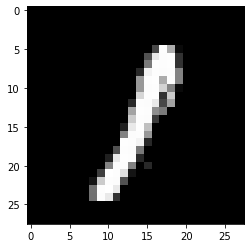

Imaginea anterioara a fost clasificata ca 8


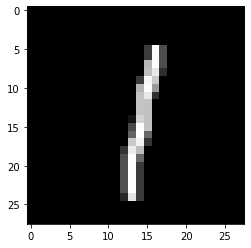

Imaginea anterioara a fost clasificata ca 0


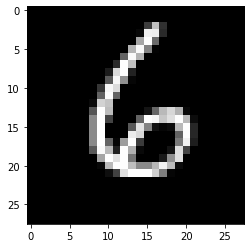

Imaginea anterioara a fost clasificata ca 9


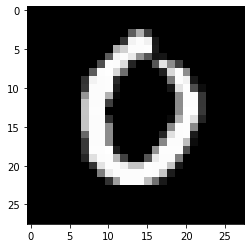

Imaginea anterioara a fost clasificata ca 9


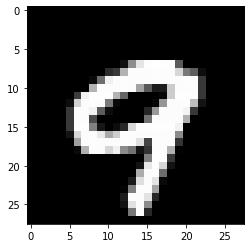

Imaginea anterioara a fost clasificata ca 3


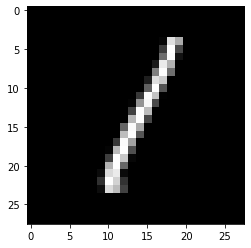

Imaginea anterioara a fost clasificata ca 8


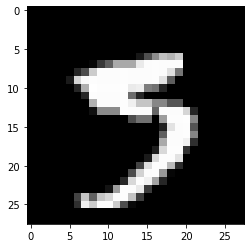

Imaginea anterioara a fost clasificata ca 9


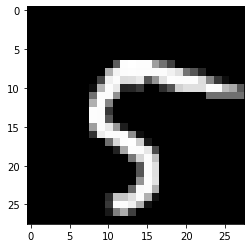

Imaginea anterioara a fost clasificata ca 8


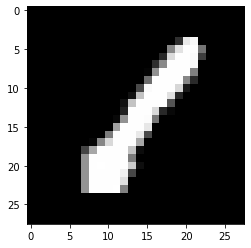

Imaginea anterioara a fost clasificata ca 8


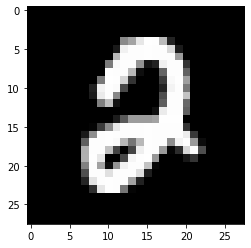

Imaginea anterioara a fost clasificata ca 4


In [35]:
num_bins = np.argmax(accuracies) * 2 + 1

naive_bayes_model = MultinomialNB()
train, test = disc(num_bins, train_images, test_images)
naive_bayes_model.fit(train, train_labels)
predicted_labels = naive_bayes_model.predict(test)

misclasified_indices = np.where(predicted_labels != test_labels)[0] 

for i in range(10):
    image = train_images[misclasified_indices[i]]
    image = np.reshape(image, (28, 28))
    plt.imshow(image.astype(np.uint8), cmap='gray')
    plt.show()
    print('Imaginea anterioara a fost clasificata ca', predicted_labels[misclasified_indices[i]])

In [52]:
def confusion_matrix(y_true, y_pred):
    length = 10
    matrix = np.zeros((length, length))
    
    for i in range(len(y_pred)):
        matrix[y_true[i]][y_pred[i]] += 1
    
    return matrix

print(confusion_matrix(test_labels, predicted_labels))

[[51.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 0. 48.  0.  0.  0.  0.  0.  0.  4.  0.]
 [ 2.  1. 50.  1.  1.  0.  1.  1.  1.  0.]
 [ 0.  0.  1. 49.  0.  0.  0.  0.  0.  3.]
 [ 0.  0.  0.  0. 33.  0.  0.  0.  2. 11.]
 [ 1.  0.  0.  9.  0. 34.  1.  0.  6.  1.]
 [ 1.  1.  0.  0.  1.  0. 43.  0.  2.  0.]
 [ 0.  1.  0.  0.  2.  0.  0. 41.  0.  6.]
 [ 0.  1.  3.  3.  1.  1.  1.  1. 34.  1.]
 [ 0.  0.  1.  1.  5.  0.  0.  0.  0. 35.]]
